In [59]:
# import the libraries 
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt 

In [60]:
# import the dataset
dataset = pd.read_csv('SBIN_data.csv')

In [61]:
dataset

,Date,Open,High,Low,Close,Volume,Time
0,01-01-2024,642.20,642.70,641.00,641.95,89481,09:15:00
1,01-01-2024,641.95,642.85,641.95,642.45,48965,09:16:00
2,01-01-2024,642.70,644.00,642.70,643.50,65729,09:17:00
3,01-01-2024,643.90,644.55,643.30,643.40,47909,09:18:00
4,01-01-2024,643.70,644.10,643.45,643.75,27645,09:19:00
...,...,...,...,...,...,...,...
8245,31-01-2024,642.90,642.90,642.50,642.80,161605,15:25:00
8246,31-01-2024,642.90,642.95,642.50,642.90,143774,15:26:00
8247,31-01-2024,642.95,643.05,642.45,642.50,166278,15:27:00
8248,31-01-2024,642.50,642.65,641.40,641.70,138018,15:28:00


In [62]:
dataset.iloc[7874,5]

21382

In [63]:
# In the data set all the date and time are read as a string object  
# so we need to convert the date and time into a datetime data 
# to_datetime() converts the date time into date
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date 
dataset['Time'] = pd.to_datetime(dataset['Time'],format='%H:%M:%S').dt.time

C:\conda_tmp\ipykernel_6324\722465042.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date


In [64]:
dataset

,Date,Open,High,Low,Close,Volume,Time
0,2024-01-01,642.20,642.70,641.00,641.95,89481,09:15:00
1,2024-01-01,641.95,642.85,641.95,642.45,48965,09:16:00
2,2024-01-01,642.70,644.00,642.70,643.50,65729,09:17:00
3,2024-01-01,643.90,644.55,643.30,643.40,47909,09:18:00
4,2024-01-01,643.70,644.10,643.45,643.75,27645,09:19:00
...,...,...,...,...,...,...,...
8245,2024-01-31,642.90,642.90,642.50,642.80,161605,15:25:00
8246,2024-01-31,642.90,642.95,642.50,642.90,143774,15:26:00
8247,2024-01-31,642.95,643.05,642.45,642.50,166278,15:27:00
8248,2024-01-31,642.50,642.65,641.40,641.70,138018,15:28:00


In [65]:
# Create a new column 'Rank' which will store the ranks of each datapoint
dataset['Rank'] = np.nan

In [66]:
print(dataset)

            Date    Open    High     Low   Close  Volume      Time  Rank
0     2024-01-01  642.20  642.70  641.00  641.95   89481  09:15:00   NaN
1     2024-01-01  641.95  642.85  641.95  642.45   48965  09:16:00   NaN
2     2024-01-01  642.70  644.00  642.70  643.50   65729  09:17:00   NaN
3     2024-01-01  643.90  644.55  643.30  643.40   47909  09:18:00   NaN
4     2024-01-01  643.70  644.10  643.45  643.75   27645  09:19:00   NaN
...          ...     ...     ...     ...     ...     ...       ...   ...
8245  2024-01-31  642.90  642.90  642.50  642.80  161605  15:25:00   NaN
8246  2024-01-31  642.90  642.95  642.50  642.90  143774  15:26:00   NaN
8247  2024-01-31  642.95  643.05  642.45  642.50  166278  15:27:00   NaN
8248  2024-01-31  642.50  642.65  641.40  641.70  138018  15:28:00   NaN
8249  2024-01-31  641.70  641.80  641.00  641.55   54342  15:29:00   NaN

[8250 rows x 8 columns]


In [67]:
# create the rank of every datapoint 
# loop will contine from last row to 1st row and calculate the rank for every minutes of a each day
for i in range (8249,-1,-1):
    vol_list = []                                 # list of volumes for currect day and previous 5 days 
    vol_list.append(dataset.iloc[i,5])           
    current_row = i

    # check the previous 5 days volume and store into the list
    for j in range (0,5):
        current_row -= 375
        if(current_row >= 0):
            vol_list.append(dataset.iloc[current_row,5])

    # convert the list of volume into a dataframe to rank them according to their volume
    vol_series = pd.Series(vol_list)
    
    # Calculate rank based on volume
    vol_rank = vol_series.rank(ascending=False, method='min').astype(int)

    # put the rank of the datapoint into rank column
    dataset.iloc[i,7] = vol_rank[0]        

In [68]:
dataset

,Date,Open,High,Low,Close,Volume,Time,Rank
0,2024-01-01,642.20,642.70,641.00,641.95,89481,09:15:00,1.0
1,2024-01-01,641.95,642.85,641.95,642.45,48965,09:16:00,1.0
2,2024-01-01,642.70,644.00,642.70,643.50,65729,09:17:00,1.0
3,2024-01-01,643.90,644.55,643.30,643.40,47909,09:18:00,1.0
4,2024-01-01,643.70,644.10,643.45,643.75,27645,09:19:00,1.0
...,...,...,...,...,...,...,...,...
8245,2024-01-31,642.90,642.90,642.50,642.80,161605,15:25:00,2.0
8246,2024-01-31,642.90,642.95,642.50,642.90,143774,15:26:00,3.0
8247,2024-01-31,642.95,643.05,642.45,642.50,166278,15:27:00,1.0
8248,2024-01-31,642.50,642.65,641.40,641.70,138018,15:28:00,2.0


# get th rank

In [69]:
# now we need fo find the rank of any point of time 
# like rank 1 means highest volume
def get_rank(date,time):
    input_date = pd.to_datetime(date)
    input_time = pd.to_datetime(time, format='%H:%M:%S').time()
    # # Filter DataFrame based on the datetime object
    filtered_row = dataset[(dataset['Date'] == input_date) & (dataset['Time'] == input_time)]

    # Extract rank from the filtered row
    if len(filtered_row) > 0:
        return filtered_row.iloc[0]['Rank']
    else:
        return "No data found for the given date and time."

    

# visualize of the rank of the specific time

In [70]:
def get_data(date,time):
    # Convert date and time to datetime object
    input_date = pd.to_datetime(date)
    input_time = pd.to_datetime(time, format='%H:%M:%S').time()
    # # Filter DataFrame based on the datetime object
    filtered_row = dataset[(dataset['Date']==input_date) & (dataset['Time']== input_time)]
    index = filtered_row.index[0]

    # add the previous 5 days volume and store into the list
    for i in range (index,-1,-1):
        vol_list_dt = []
        vol_list_dt.append(dataset.iloc[i,5])
        current_row = i
        for j in range (0,5):
            current_row -= 375
            if(current_row >= 0):
                vol_list_dt.append(dataset.iloc[current_row,5])
        return vol_list_dt

In [71]:
date_input = '09-01-2024'
time_input = '15:28:00'

In [72]:
print(get_rank(date_input, time_input))

4.0


C:\conda_tmp\ipykernel_6324\2884951210.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  filtered_row = dataset[(dataset['Date'] == input_date) & (dataset['Time'] == input_time)]


In [73]:
get_vol = get_data(date_input, time_input)
print(get_vol)

C:\conda_tmp\ipykernel_6324\2021947079.py:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  filtered_row = dataset[(dataset['Date']==input_date) & (dataset['Time']== input_time)]


[65310, 43422, 102650, 79663, 53635, 72483]


Text(0.5, 1.0, 'Volume of Data Points')

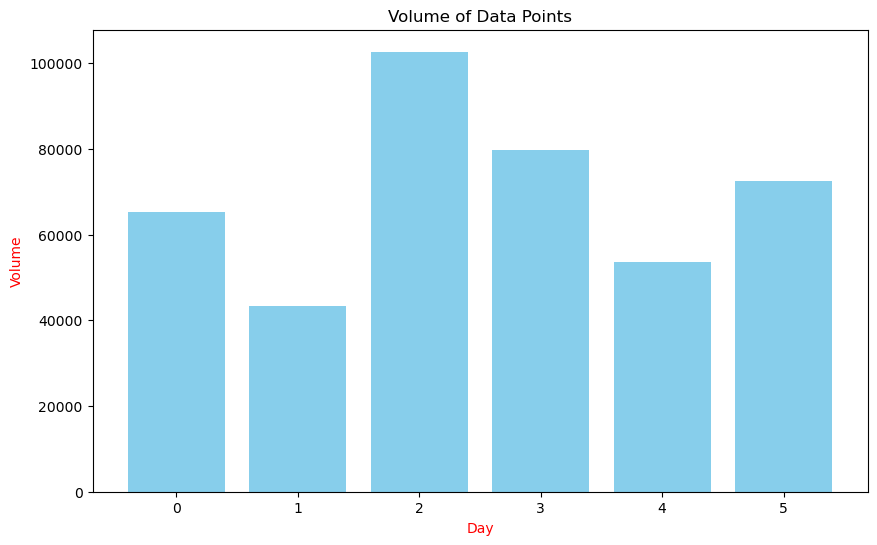

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(get_vol)), get_vol, color='skyblue')
plt.xlabel('Day',color = 'red')
plt.ylabel('Volume',color ='red')
plt.title('Volume of Data Points')

In [76]:
dataset.to_csv('out.csv')